In [106]:
!pip install tabulate

In [109]:
import pandas as pd
runs = pd.read_csv("runs.csv", parse_dates = ["Date"])
runs

,Date,Name,Tiles,New Tiles,Moving time,Elapsed time,Average,Distance (m),Elevation (m),Type,Commute,Trainer,Max heartrate,Avg heartrate,Start Lat,Start Long,Gear
0,2023-07-30 18:34:42,"Heavy rain, grazing on blackberries",7,4,7455,8206,10.1484,21012.5,47.1,Run,0,0,0,0,51.5555,-0.080539,NaN
1,2023-07-27 19:06:27,Evening Run,4,0,1046,1309,11.9772,3479.5,15.3,Run,0,0,0,0,51.5556,-0.080564,NaN
2,2023-07-26 07:20:46,Morning Run,4,0,3368,4697,9.6840,9058.4,40.5,Run,0,0,0,0,51.5556,-0.080450,NaN
3,2023-07-23 19:44:19,Evening Run,4,0,1304,2055,10.3716,3757.1,14.9,Run,0,0,0,0,51.5553,-0.080291,NaN
4,2023-07-22 20:09:37,Night Run,5,1,4073,5099,10.1772,11514.3,43.8,Run,0,0,0,0,51.5555,-0.080549,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191,2017-04-23 19:01:35,Evening Run,4,0,2899,2948,10.6128,8547.3,17.8,Run,0,0,0,0,52.2080,0.119659,NaN
192,2017-03-06 18:35:40,Evening Run,4,3,2950,2972,11.3328,9287.6,12.0,Run,0,0,0,0,52.2080,0.119585,NaN
193,2017-02-14 19:15:36,Evening Run,4,0,3166,3286,9.9144,8717.6,17.7,Run,0,0,0,0,52.2079,0.119709,NaN
194,2017-01-30 19:10:27,Evening Run,4,0,3059,3172,10.1196,8598.0,17.7,Run,0,0,0,0,52.2081,0.119615,NaN


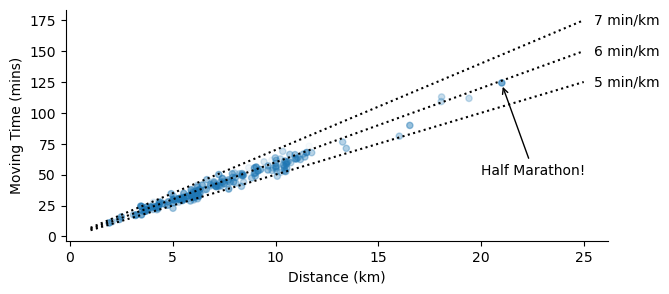

In [174]:
from matplotlib import pyplot as plt
import numpy as np
from datetime import datetime

def fade_out_by_date(dates, low = None, high = None):
    low, high = low or min(dates), high or max(dates)
    range = (high - low)
    return (dates - low) / range

f, ax = plt.subplots(figsize = (7,3))
ax.set(ylabel = "Moving Time (mins)", xlabel = "Distance (km)")

x = runs["Distance (m)"].values/1e3
y = runs["Moving time"].values/60

dists = np.linspace(1, 25, 2)
for i in [5,6,7]:
    mins_per_km = i * dists
    ax.plot(dists, mins_per_km, color = "black", linestyle = "dotted", label = f"{i} min/km")
    ax.text(25.5, 25*i, f"{i} min/km", va = "center")

ax.annotate("Half Marathon!", (x[0], y[0]-1), (20, 50), arrowprops = dict(arrowstyle = "->"))

ax.scatter(x, y, s=20, alpha = 0.6*fade_out_by_date(runs["Date"]))
ax.spines[['right', 'top']].set_visible(False)
f.savefig("time_vs_distance.svg", transparent=True)
f.savefig("time_vs_distance.png", transparent=True)

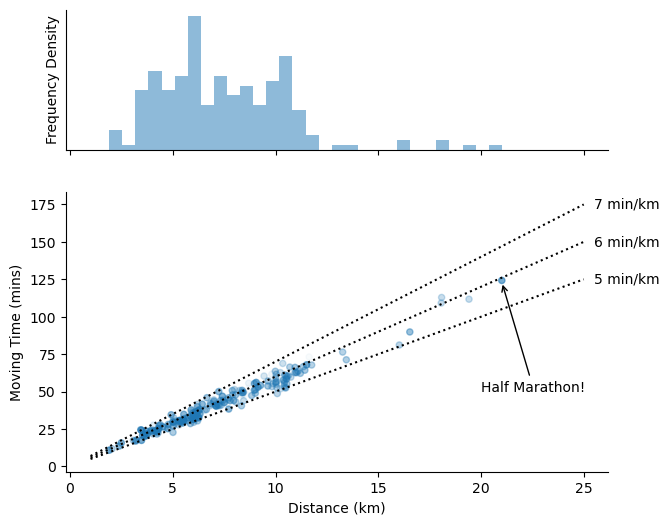

In [172]:
f, (ax2, ax) = plt.subplots(nrows=2, figsize = (7,6), sharex = True,
                           gridspec_kw = dict(height_ratios = (1,2)))

ax.set(ylabel = "Moving Time (mins)", xlabel = "Distance (km)")

x = runs["Distance (m)"].values/1e3
y = runs["Moving time"].values/60

dists = np.linspace(1, 25, 2)
for i in [5,6,7]:
    mins_per_km = i * dists
    ax.plot(dists, mins_per_km, color = "black", linestyle = "dotted", label = f"{i} min/km")
    ax.text(25.5, 25*i, f"{i} min/km", va = "center")

ax.annotate("Half Marathon!", (x[0], y[0]-1), (20, 50), arrowprops = dict(arrowstyle = "->"))

ax.scatter(x, y, s=20, alpha = 0.6*fade_out_by_date(runs["Date"]))
for a in [ax, ax2]: a.spines[['right', 'top']].set_visible(False)

ax2.hist(x, bins = 30, alpha = 0.5)
ax2.set(yticks=[], ylabel = "Frequency Density")

f.savefig("time_vs_distance_plus_hist.svg", transparent=True)

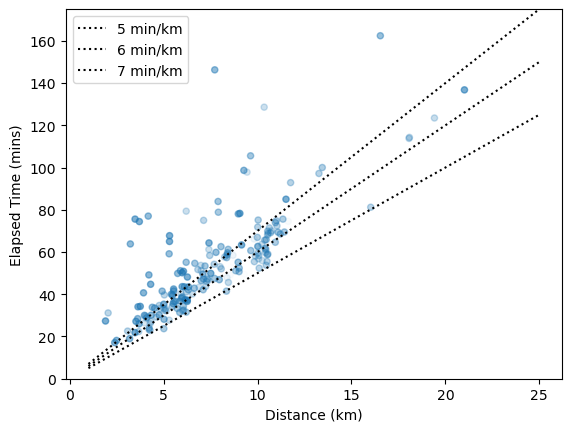

In [59]:
f, ax = plt.subplots()
ax.set(ylabel = "Elapsed Time (mins)", xlabel = "Distance (km)", ylim = (0, 175))

dists = np.linspace(1, 25, 2)
for i in [5,6,7]:
    mins_per_km = i * dists
    ax.plot(dists, mins_per_km, color = "black", linestyle = "dotted", label = f"{i} min/km")

ax.scatter(y = runs["Elapsed time"]/60, x = runs["Distance (m)"]/1e3, s=20, alpha = 0.6*fade_out_by_date(runs["Date"]))

ax.legend()

In [103]:

script = """
<script src="https://d3js.org/d3.v4.js"></script>
<script>

// set the dimensions and margins of the graph
var margin = {top: 10, right: 30, bottom: 30, left: 60},
    width = 460 - margin.left - margin.right,
    height = 400 - margin.top - margin.bottom;

// append the svg object to the body of the page
var svg = d3.select("#my_dataviz")
  .append("svg")
    .attr("width", width + margin.left + margin.right)
    .attr("height", height + margin.top + margin.bottom)
  .append("g")
    .attr("transform",
          "translate(" + margin.left + "," + margin.top + ")");

//Read the data
d3.csv("http://localhost:8888/files/tomhodson.github.com/assets/blog/running/runs.csv?_xsrf=2%7C2490f004%7Cdbdffe7a8b66a073c9c5821633171301%7C1688987029", function(data) {

  // Add X axis
  var x = d3.scaleLinear()
    .domain([0, 25])
    .range([ 0, width ]);
  svg.append("g")
    .attr("transform", "translate(0," + height + ")")
    .call(d3.axisBottom(x));

  // Add Y axis
  var y = d3.scaleLinear()
    .domain([0, 180])
    .range([ height, 0]);
  svg.append("g")
    .call(d3.axisLeft(y))
    .attr("class", "YAxis");

  // Add dots
  svg.append('g')
    .selectAll("dot")
    .data(data)
    .enter()
    .append("circle")
      .attr("cx", function (d) { return x(d["Distance (m)"] / 1000); } )
      .attr("cy", function (d) { return y(d["Moving time"] / 60); } )
      .attr("r", 3)
      .style("fill", "#69b3a2")


  triggerTransition = () => {

    y.domain([0, 300])
  
    svg.selectAll("circle")
    .data(data)
    .transition()
    .delay(100)
    .duration(2000)
    .attr("transform", function(d) { return "translate(0," + y(-(d["Elapsed time"]-d["Moving time"]) / 60) + ")"; })
    
    // .attr("cy", function (d) { return y(d["Elapsed time"] / 60); } )

    svg.select(".YAxis")
    .transition()
    .duration(3000)
    .call(d3.axisLeft(y));
    }

})


</script>

<button onclick="triggerTransition()">Trigger transition</button>
<!-- Create a div where the graph will take place -->
<div id="my_dataviz"></div>
"""

from IPython.display import display, HTML
HTML(script)

In [219]:
vdot_table = pd.read_csv("vdot.csv")
table_dists = [1.5, 1.5609, 3, 2*1.609, 5, 10, 15, 42.195/2, 42.195]

for col in vdot_table.columns[1:]:
    seconds = vdot_table[col].str.split(":").apply(lambda s: sum(int(x)*60**i for i,x in enumerate(s[::-1])))
    vdot_table[col] = seconds / 60 #pd.to_timedelta(seconds, unit='s')

for i, row in vdot_table.iterrows():
    vdot, *times = row
    print(vdot, times)

30.0 [8.5, 9.183333333333334, 17.933333333333334, 19.316666666666666, 30.666666666666668, 63.766666666666666, 98.23333333333333, 141.06666666666666, 289.28333333333336]
31.0 [8.25, 8.916666666666666, 17.45, 18.8, 29.85, 62.06666666666667, 95.6, 137.35, 281.95]
32.0 [8.033333333333333, 8.683333333333334, 16.983333333333334, 18.3, 29.083333333333332, 60.43333333333333, 93.11666666666666, 133.81666666666666, 274.98333333333335]
33.0 [7.816666666666666, 8.45, 16.55, 17.833333333333332, 28.35, 58.9, 90.75, 130.45, 268.3666666666667]
34.0 [7.616666666666666, 8.233333333333333, 16.15, 17.4, 27.65, 57.43333333333333, 88.5, 127.26666666666667, 262.05]
35.0 [7.416666666666667, 8.016666666666667, 15.75, 16.966666666666665, 27.0, 56.05, 86.36666666666666, 124.21666666666667, 256.05]
36.0 [7.233333333333333, 7.816666666666666, 15.383333333333333, 16.566666666666666, 26.366666666666667, 54.733333333333334, 84.33333333333333, 121.31666666666666, 250.31666666666666]
37.0 [7.066666666666666, 7.63333333

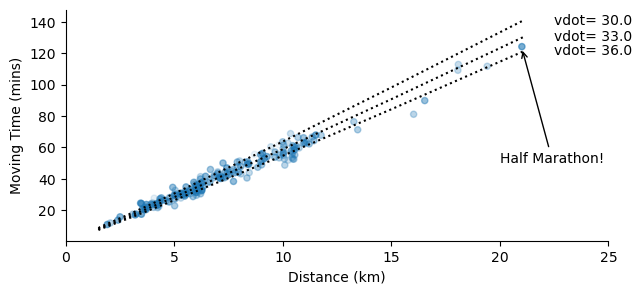

In [234]:
f, ax = plt.subplots(figsize = (7,3))
ax.set(ylabel = "Moving Time (mins)", xlabel = "Distance (km)", xlim = (0,25))

x = runs["Distance (m)"].values/1e3
y = runs["Moving time"].values/60


for i, row in list(vdot_table.iterrows())[:-1:3]:
    vdot, *times = row[:-1]
    ax.plot(table_dists[:-1], times, color = "black", linestyle = "dotted", label = f"{i} min/km")
    ax.text(22.5, times[-1], f"vdot= {vdot}", va = "center")

ax.annotate("Half Marathon!", (x[0], y[0]-1), (20, 50), arrowprops = dict(arrowstyle = "->"))

ax.scatter(x, y, s=20, alpha = 0.6*fade_out_by_date(runs["Date"]))
ax.spines[['right', 'top']].set_visible(False)
f.savefig("time_vs_distance.svg", transparent=True)
f.savefig("time_vs_distance.png", transparent=True)